## Week 4 Class activities
This notebook is a starting point for the exercises and activities that we'll do in class.

Before you attempt any of these activities, make sure to watch the video lectures for this week.

### Spatial joins
In the Data Wrangling lecture, we used the [dataset on California traffic collisions](https://tims.berkeley.edu/help/SWITRS.php). Let's revisit that dataset, but make use of the spatial information this time.

Below is the code that we used in lecture to load in the data. It's just one month from Ventura County; if you want more, you'll need to register.

An aside: Note that the paths are a little different because the data files are under `lectures/data`, not `classes/data`. The `..` directory means "up one level."

The `os` module has some useful functions for directory and file operations. 

In [6]:
import os

# see what directory we are in
os.getcwd()

'/Users/lupita/Desktop/GitHub/urbandatascience-s22/classes'

In [2]:
# list the current directory contents
os.listdir()

['.DS_Store',
 '.ipynb_checkpoints',
 'Class 1 solutions.ipynb',
 'Class 1.ipynb',
 'Class 2 solutions.ipynb',
 'Class 2.ipynb',
 'Class 3 solutions.ipynb',
 'Class 3.ipynb',
 'Class 4.ipynb']

In [3]:
# list the parent directory contents
os.listdir('..')

['.DS_Store',
 '.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'classes',
 'environment.yml',
 'hws',
 'Lectures',
 'LICENSE',
 'README.md']

In [93]:
# load in the data
import pandas as pd
collisionDf = pd.read_csv('../Lectures/data/Collisions.csv')

<div class="alert alert-block alert-info">

<strong>Exercise:</strong> What columns provide the spatial coordinates? What problems might there be with each one?
</div>

*Hint*: Look at the [codebook](https://tims.berkeley.edu/help/SWITRS.php) to see the column definitions. You have two choices - there are minor differences.
    
*Hint*: Use `head()` to look at the first rows of the relevant columns . What problems are there with each of them?

In [94]:
# your code here
collisionDf[['LATITUDE', 'LONGITUDE', 'POINT_X', 'POINT_Y']].head()

,LATITUDE,LONGITUDE,POINT_X,POINT_Y
0,34.220058,-119.038971,-119.039001,34.219994
1,NaN,NaN,-118.883827,34.182751
2,NaN,NaN,-118.926300,34.182961
3,34.205349,-119.040993,-119.040749,34.205418
4,34.280899,-119.285400,NaN,NaN


You'll notice that there is some missing data. There is a helpful function, `fillna()` in pandas that will fill in missing values from another columns. Take a look at the documentation.

In [95]:
collisionDf['LATITUDE'].fillna(value=collisionDf['POINT_Y'], inplace=True)
collisionDf['LONGITUDE'].fillna(value=collisionDf['POINT_X'], inplace=True)

Note that the `value` argument can be a scalar (e.g. you can replace all NaNs with 0), or another column (e.g. you can replace all NaNs in the `LONGITUDE` column with values from `POINT_X`.) [See the example here](https://stackoverflow.com/questions/30357276/how-to-pass-another-entire-column-as-argument-to-pandas-fillna).

Also note that there is an `inplace` keyword argument, which we've seen before with the `set_index()` function. It works the same way.

<div class="alert alert-block alert-info">

<strong>Exercise:</strong> Fill in the missing values in the latitude and longitude columns.

In [96]:
# your code here
collisionDf[['LATITUDE', 'LONGITUDE', 'POINT_X', 'POINT_Y']].head()


,LATITUDE,LONGITUDE,POINT_X,POINT_Y
0,34.220058,-119.038971,-119.039001,34.219994
1,34.182751,-118.883827,-118.883827,34.182751
2,34.182961,-118.926300,-118.926300,34.182961
3,34.205349,-119.040993,-119.040749,34.205418
4,34.280899,-119.285400,NaN,NaN


<div class="alert alert-block alert-info">

<strong>Exercise:</strong> Convert your dataframe to a GeoDataFrame. Call it <strong>collisionGdf</strong>. 
    
Do a quick-and-dirty plot of the points to satisfy yourself that it worked.

*Hint*: The geopandas `points_from_xy()` function will be helpful.



In [97]:
# your code here
import geopandas
collisionGdf = geopandas.GeoDataFrame(
    collisionDf, geometry=geopandas.points_from_xy(collisionDf.LONGITUDE, collisionDf.LATITUDE, crs='EPSG:4326'))
collisionGdf

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y,geometry
0,8167180,2018,2020-05-26,5600,2018-01-29,1700,3386,8125,1,5,...,0,-,-,34.220058,-119.038971,VENTURA,CAMARILLO,-119.039001,34.219994,POINT (-119.03897 34.22006)
1,8414912,2018,2018-02-14,5600,2018-01-30,1840,2740,9080,2,5,...,0,-,-,34.182751,-118.883827,VENTURA,THOUSAND OAKS,-118.883827,34.182751,POINT (-118.88383 34.18275)
2,8414916,2018,2018-02-14,5600,2018-01-22,1425,2740,9122,1,5,...,0,-,-,34.182961,-118.926300,VENTURA,THOUSAND OAKS,-118.926300,34.182961,POINT (-118.92630 34.18296)
3,8504531,2018,2018-08-15,5600,2018-01-31,2358,5002,8153,3,5,...,0,-,-,34.205349,-119.040993,VENTURA,CAMARILLO,-119.040749,34.205418,POINT (-119.04099 34.20535)
4,8513493,2018,2018-02-15,5608,2018-01-01,1801,492,NaN,1,5,...,0,-,-,34.280899,-119.285400,VENTURA,VENTURA,NaN,NaN,POINT (-119.28540 34.28090)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,90657640,2018,2018-02-08,9765,2018-01-23,640,14823,NaN,2,1,...,0,-,-,34.266041,-119.123833,VENTURA,UNINCORPORATED,-119.123802,34.266079,POINT (-119.12383 34.26604)
316,90659830,2018,2018-02-12,9765,2018-01-31,755,15117,NaN,3,1,...,0,-,-,34.189941,-119.171951,VENTURA,OXNARD,-119.171082,34.190517,POINT (-119.17195 34.18994)
317,90697058,2018,2018-04-02,9765,2018-01-17,1404,15117,NaN,3,2,...,0,-,-,34.201908,-119.124634,VENTURA,UNINCORPORATED,-119.125694,34.201843,POINT (-119.12463 34.20191)
318,90766786,2018,2018-07-11,9770,2018-01-24,1631,17973,NaN,3,2,...,0,-,-,34.406818,-118.757011,VENTURA,UNINCORPORATED,-118.757011,34.406784,POINT (-118.75701 34.40682)


<AxesSubplot:>

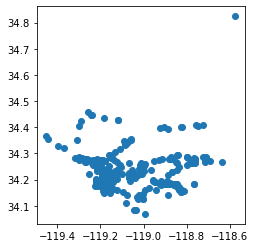

In [98]:
collisionGdf.plot()

What do we join the collision data to?

Let's do two separate analyses:
* Look at the transportation justice aspects of road safety, through joining the collision data to the CalEnviroScreen data
* Look at school safety, through joining the collision data to school locations

## Collisions and neighborhood characteristics

Let's start with the EnviroScreen. We already used this data set, so let's load it into `geopandas`.

In [99]:
import geopandas as gpd
enviroscreen = gpd.read_file('../Lectures/data/CalEnviroScreen/CES4 Final Shapefile.shp')


<div class="alert alert-block alert-info">
    <strong>Exercise:</strong> Drop all the rows from <strong>enviroscreen</strong> except for those in Ventura County.
</div>

*Hint*: The `df=df[...]` syntax is the easiest way to do this. It will just keep the rows where the condition inside the `[ ]` is `True`.

For example, this will only keep the census tracts with population greater than 5000.

`enviroscreen = enviroscreen[enviroscreen.TotPop19>5000]`

In [100]:
# This returns a boolean Series
enviroscreen.TotPop19>5000

0       False
1        True
2       False
3       False
4       False
        ...  
8030     True
8031    False
8032     True
8033     True
8034    False
Name: TotPop19, Length: 8035, dtype: bool

In [12]:
# Then we pass that series to only return values from the DataFrame where the condition evaluated to True
# Note that rows with index 4581, 4583, etc. have been filtered out
enviroscreen[enviroscreen.TotPop19>5000]

,Tract,ZIP,County,ApproxLoc,TotPop19,CIscore,CIscoreP,Ozone,OzoneP,PM2_5,...,Elderly65,Hispanic,White,AfricanAm,NativeAm,OtherMult,Shape_Leng,Shape_Area,AAPI,geometry
1,6.083002e+09,93455,Santa Barbara,Santa Maria,13173,37.030667,70.637922,0.035217,11.561917,7.624775,...,5.3519,78.6229,13.2240,2.5051,0.0000,0.9489,19100.578232,1.635292e+07,4.6990,"POLYGON ((-39795.070 -341919.191, -39803.632 -..."
5,6.083002e+09,93455,Santa Barbara,Orcutt,7074,9.958479,12.808875,0.036244,13.615432,7.724757,...,15.8609,33.4040,58.4111,2.6859,0.0000,2.7000,8840.458254,3.302911e+06,2.7990,"POLYGON ((-38569.104 -346719.636, -38321.954 -..."
6,6.083002e+09,93455,Santa Barbara,Santa Maria,10983,14.756415,24.899143,0.035217,11.561917,7.688175,...,13.7758,40.0892,46.1440,1.7299,0.1548,3.5874,11494.072875,5.320774e+06,8.2947,"POLYGON ((-38140.258 -343585.801, -38181.197 -..."
8,6.011000e+09,95932,Colusa,Unincorporated Colusa County area,5027,31.103200,60.854766,0.045132,40.000000,8.530644,...,17.1076,50.1293,44.0422,1.5317,0.7360,2.4866,96227.842779,2.168657e+08,1.0742,"POLYGON ((-183817.545 142033.537, -177915.476 ..."
10,6.011000e+09,95987,Colusa,Unincorporated Colusa County area,5963,27.442417,53.870398,0.043567,32.171749,6.812457,...,11.1856,74.4759,20.1744,0.1509,1.2074,0.7714,162413.415976,9.529411e+08,3.2198,"POLYGON ((-200821.626 145978.739, -200469.975 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8015,6.037144e+09,91604,Los Angeles,Los Angeles,5482,24.120351,47.012103,0.056800,75.121344,11.559329,...,11.2915,9.0113,76.8150,5.8190,0.0000,5.0164,5752.481779,1.236800e+06,3.3382,"POLYGON ((147852.793 -428236.382, 147860.430 -..."
8018,6.037144e+09,91604,Los Angeles,Los Angeles,5770,15.691711,27.105396,0.055353,72.831363,11.449679,...,15.8406,11.1265,75.3033,4.6447,0.0000,2.3050,10944.014042,2.606043e+06,6.6205,"POLYGON ((149067.633 -429382.784, 149344.445 -..."
8030,6.037430e+09,91016,Los Angeles,Monrovia,5339,17.124832,30.610187,0.062365,88.699440,11.873339,...,17.4752,28.7132,53.3995,1.5733,0.0000,7.1549,7166.130635,1.938016e+06,9.1590,"POLYGON ((185152.883 -426843.064, 185240.372 -..."
8032,6.037431e+09,91016,Los Angeles,Monrovia,6758,39.697849,74.508321,0.061338,84.579963,11.892654,...,7.2951,58.2273,16.1438,8.9967,0.0000,1.1098,8020.091253,3.015661e+06,15.5223,"POLYGON ((184530.475 -428031.241, 184535.255 -..."


In [101]:
# your code here to limit the dataframe to Ventura County
enviroscreen.County=='Ventura'
VenturaDf=enviroscreen[enviroscreen.County=='Ventura']
VenturaDf


,Tract,ZIP,County,ApproxLoc,TotPop19,CIscore,CIscoreP,Ozone,OzoneP,PM2_5,...,Elderly65,Hispanic,White,AfricanAm,NativeAm,OtherMult,Shape_Leng,Shape_Area,AAPI,geometry
4580,6.111001e+09,93060,Ventura,Santa Paula,7508,33.384185,64.762985,0.047165,50.541381,8.966109,...,7.4188,88.0394,6.9393,0.0133,0.2797,2.4907,5097.821978,1.427820e+06,2.2376,"POLYGON ((85037.273 -407887.964, 84379.117 -40..."
4581,6.111000e+09,93015,Ventura,Unincorporated Ventura County area,4279,25.600904,50.126072,0.050276,62.663348,8.296266,...,13.8817,74.7838,23.7439,0.0000,0.0000,0.6076,41065.729183,4.486870e+07,0.8647,"POLYGON ((98950.452 -398671.329, 99030.617 -39..."
4582,6.111008e+09,93065,Ventura,Unincorporated Ventura County area,8106,19.830669,37.052446,0.053521,69.570628,9.044973,...,16.5556,14.4954,72.4032,0.0000,1.1966,2.4426,48887.460169,4.819308e+07,9.4621,"POLYGON ((114534.477 -404079.573, 114597.766 -..."
4583,6.111000e+09,93066,Ventura,Unincorporated Ventura County area,1697,39.967293,74.936964,0.046600,47.093964,8.830256,...,22.8049,59.1632,39.2457,0.0000,0.0000,0.1768,46958.825146,5.356127e+07,1.4143,"POLYGON ((91231.624 -405148.502, 91207.000 -40..."
4584,6.111008e+09,93063,Ventura,Simi Valley,4843,25.546400,49.987393,0.056051,74.100809,9.323638,...,14.3506,17.9641,61.9451,0.7640,0.0000,2.8495,7090.731130,2.703201e+06,16.4774,"POLYGON ((120461.303 -414077.348, 120477.575 -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4748,6.111005e+09,93033,Ventura,Oxnard,7788,34.755338,67.183560,0.041252,24.878656,8.768525,...,4.9692,92.2316,3.3770,1.9260,0.2440,0.5907,3218.469438,6.419593e+05,1.6307,"POLYGON ((75812.784 -428677.964, 75813.483 -42..."
4749,6.111004e+09,93041,Ventura,Port Hueneme,5978,23.031497,44.591528,0.041252,24.878656,8.792037,...,20.5587,56.6076,29.3409,7.2432,0.2676,2.2583,6091.851098,1.431493e+06,4.2823,"POLYGON ((73319.460 -425760.370, 73306.903 -42..."
4750,6.111004e+09,93033,Ventura,Oxnard,5033,30.758399,60.173979,0.041252,24.878656,8.863625,...,7.6098,93.0856,2.1260,0.6954,0.0000,0.0000,4017.348039,9.501262e+05,4.0930,"POLYGON ((75806.639 -424760.135, 75814.217 -42..."
4751,6.111003e+09,93036,Ventura,Oxnard,5509,19.904701,37.329803,0.041926,26.695706,8.988194,...,6.8978,64.8938,21.5647,4.1750,0.0000,3.5578,4920.423687,1.287080e+06,5.8087,"POLYGON ((75777.891 -420713.982, 75646.301 -42..."


In [103]:
VenturaDf= VenturaDf.to_crs('EPSG:4326')

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Add the number of collisions to each census tract in the EnviroScreen data frame.
</div>

*Hints*:
- Think about projections!
- I suggest a multistep process
  - What census tract is the collision in? Do a spatial join to add the tract (which is in `enviroscreen`) to the collisions dataframe.
  - How many collisions are there in each tract? Use `groupby`! Create a new dataframe with the tract-level counts.
  - Then you can join these counts back to `enviroscreen` using the `Tract` column
  
  
If you get an error in the final join, `Other Series must have a name`, you can add a name to a pandas `Series` as follows (remember that a Series is like a one-column DataFrame):

    `your_series_name.name = 'n_collisions'`

<AxesSubplot:>

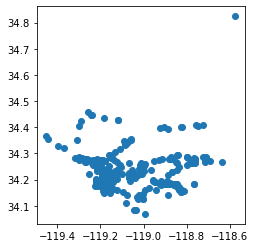

In [105]:
# your code here
collisionGdf.crs
collisionGdf.plot()

In [106]:
coll_ventura = gpd.sjoin(collisionGdf, VenturaDf, how="left", predicate='intersects')
coll_ventura.head()

RTreeError: Coordinates must not have minimums more than maximums

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Plot the relationship between traffic collisions and the Enviroscreen score, and/or some of the demographic indicators.
</div>

*Hints*:
- The `CIscoreP` gives the percentile of each census tract. The higher the score, the more the pollution burden and/or vulnerability as measured via demographic characteristics. Disadvantaged communities are defined as those with a percentile of 75 or greater.
- Try boxplots, scatterplots, or the `seaborn.regplot` (a scatter plot with the line of best fit)
- You can also map the results

In [ ]:
# your code here


## Schools
Now let's do a join to the schools dataset. [Download the shapefile with the point location of schools](https://data-cdegis.opendata.arcgis.com/datasets/CDEGIS::california-schools-2019-20/about). If you put it in your class repository in the `classes/` directory, you won't have to specify the path.


<div class="alert alert-block alert-info">
    <strong>Exercise:</strong> Load the schools data into a geodataframe called <strong>schools</strong>. Drop all the schools that are not in Ventura County. (You can use the <strong>CountyName</strong> column.)
</div>

In [ ]:
# your code here


<div class="alert alert-block alert-info">
    <strong>Exercise:</strong>In my version of the data, it looks like there is an errant school in the far north of California, that only purports to be in Ventura County. Identify and drop it.
</div>

*Hint*: There are several ways to approach this. My approach would be to:

* Create a new column with the `y` coordinate: `schools['y'] = schools.geometry.y`
* Sort by this column to find the row with the highest value of `y`
* Drop that row (e.g. `schools = schools[schools.y<some_value_of_y]`


In [ ]:
# your code here


Now, how do we join the schools to the collision data? Both are point geometries

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Think conceptually about different options to do the join. It can help to do some sketches.</div>

There are several ways to do this, but let's look at the number of collisions within a 1km radius of each school. Then, we can follow a five-step process:
* Make sure we are working in a suitable projection
* Create a 1km buffer around each school
* Do a spatial join between collisions and (buffered) schools, attaching school ids to the collision geodataframe
* Group by the school id to get the counts
* Join back to the school data


*NOTE*: Buffering a geometry isn't usually the most efficient way to get this count, because creating new geometries takes time and memory. Instead, we could get the distances between each school and each collision, and count the number with a distance (like we did in the video lecture). That's a little more complicated, and for a small dataset the speed penalty is going to be minimal. But for large datasets, try and avoid creating buffer geometries.

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Find the relevant State Plane coordinate reference system for Ventura County (choose the one in meters, not feet). Convert both <strong>schools</strong> and <strong>collisionGdf</strong> to that crs.</div>

In [ ]:
# your code here


<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Convert the school geometry into a 1km buffer.

*Hint*: The `buffer()` function will work here. It will create a new geometry, which you can use to overwrite the old one. You can buffer lines and polygons as well as points.

For example: `gdf.geometry = gdf.geometry.buffer(100)`. 

In [ ]:
# your code here


<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Add a column to the schools data with the number of collisions within 1km.

*Hint*: You should now be able to follow steps 3-5 using the same procedure as with the EnviroScreen data. 

In [ ]:
# your code here


<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Map the number of collisions near each school.

*Hints*: 
* There are several ways to do this. You could do proportional markers (you might need to scale the `n_collisions` column). Add a basemap too!
* Note that you can't do proportional circles for the schools polygon geometry - just for points. You'll need to convert the geometry back to the centroids (`gdf.geometry = gdf.geometry.centroid`). (Or you could have saved a copy of the old geodataframe and joined the collision counts back to that.)

In [ ]:
# your code here


## Joins gone wrong

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Fix the errors in each cell below. (Not all of them generate Python exceptions, but the join might not be what you expect.)
</div>

In [88]:
# first, reload a clean copy of the data
collisionDf = pd.read_csv('../Lectures/data/Collisions.csv')
enviroscreen = gpd.read_file('../Lectures/data/CalEnviroScreen/CES4 Final Shapefile.shp')
collisionGdf = geopandas.GeoDataFrame(
    collisionDf, geometry=geopandas.points_from_xy(collisionDf.LONGITUDE, collisionDf.LATITUDE, crs='EPSG:4326'))
collisionGdf

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y,geometry
0,8167180,2018,2020-05-26,5600,2018-01-29,1700,3386,8125,1,5,...,0,-,-,34.220058,-119.038971,VENTURA,CAMARILLO,-119.039001,34.219994,POINT (-119.03897 34.22006)
1,8414912,2018,2018-02-14,5600,2018-01-30,1840,2740,9080,2,5,...,0,-,-,NaN,NaN,VENTURA,THOUSAND OAKS,-118.883827,34.182751,POINT (nan nan)
2,8414916,2018,2018-02-14,5600,2018-01-22,1425,2740,9122,1,5,...,0,-,-,NaN,NaN,VENTURA,THOUSAND OAKS,-118.926300,34.182961,POINT (nan nan)
3,8504531,2018,2018-08-15,5600,2018-01-31,2358,5002,8153,3,5,...,0,-,-,34.205349,-119.040993,VENTURA,CAMARILLO,-119.040749,34.205418,POINT (-119.04099 34.20535)
4,8513493,2018,2018-02-15,5608,2018-01-01,1801,492,NaN,1,5,...,0,-,-,34.280899,-119.285400,VENTURA,VENTURA,NaN,NaN,POINT (-119.28540 34.28090)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,90657640,2018,2018-02-08,9765,2018-01-23,640,14823,NaN,2,1,...,0,-,-,34.266041,-119.123833,VENTURA,UNINCORPORATED,-119.123802,34.266079,POINT (-119.12383 34.26604)
316,90659830,2018,2018-02-12,9765,2018-01-31,755,15117,NaN,3,1,...,0,-,-,34.189941,-119.171951,VENTURA,OXNARD,-119.171082,34.190517,POINT (-119.17195 34.18994)
317,90697058,2018,2018-04-02,9765,2018-01-17,1404,15117,NaN,3,2,...,0,-,-,34.201908,-119.124634,VENTURA,UNINCORPORATED,-119.125694,34.201843,POINT (-119.12463 34.20191)
318,90766786,2018,2018-07-11,9770,2018-01-24,1631,17973,NaN,3,2,...,0,-,-,34.406818,-118.757011,VENTURA,UNINCORPORATED,-118.757011,34.406784,POINT (-118.75701 34.40682)


In [107]:
# spatial join between collisions and EnviroScreen
joined = gpd.sjoin(collisionGdf, enviroscreen, predicate='within')

/var/folders/92/rtv_zgdd60n1wd_0q65qz2b40000gn/T/ipykernel_3420/3041556669.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:3310

  joined = gpd.sjoin(collisionGdf, enviroscreen, predicate='intersects')


RTreeError: Coordinates must not have minimums more than maximums

In [ ]:
# get number of collisions in each census tract
collisionGdf = gpd.GeoDataFrame(collisionDf, 
                                geometry=gpd.points_from_xy(collisionDf.LONGITUDE.fillna(collisionDf.POINT_X), 
                                                            collisionDf.LATITUDE.fillna(collisionDf.POINT_Y), 
                                          crs='EPSG:4326'))

joined = gpd.sjoin(collisionGdf, enviroscreen, predicate='contains')

<div class="alert alert-block alert-info">
<h3>What you should have learned</h3>
<ul>
  <li>Gain more practice with spatial joins</li>
  <li>Understand how to buffer geometries.</li>
  <li>Get practice with troubleshooting spatial joins.</li>
</ul>
</div>